In [252]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import ttest_ind
from scipy import stats

In [253]:
#read in the file
df = pd.read_csv('../zaria/Desktop/datastuff/datastuff/projects/project-1-group-04/data/clean_life_expectancy.csv')
#display the first few rows
df.head()

,Unnamed: 0,country,year,life_expectancy,smoking_deaths,obesity_deaths,deaths_by_suicide,mean_years_of_schooling,population,gdp,gov_health_expenditure
0,0,Afghanistan,2002,56.4538,4.484723,109.050644,7.85,1.522516,21000258,1280.4631,1.21
1,1,Afghanistan,2003,57.3445,4.593383,110.698310,7.72,1.579871,22645136,1292.3335,5.46
2,2,Afghanistan,2004,57.9436,4.665421,113.260590,7.77,1.637226,23553554,1260.0605,3.60
3,3,Afghanistan,2005,58.3608,4.708809,115.482414,7.64,1.694581,24411196,1352.3207,3.37
4,4,Afghanistan,2006,58.6844,4.746228,119.301240,7.56,1.776703,25442946,1366.9932,2.72


In [254]:
df.columns

Index(['Unnamed: 0', 'country', 'year', 'life_expectancy', 'smoking_deaths',
       'obesity_deaths', 'deaths_by_suicide', 'mean_years_of_schooling',
       'population', 'gdp', 'gov_health_expenditure'],
      dtype='object')

In [255]:
df.dtypes

Unnamed: 0                   int64
country                     object
year                         int64
life_expectancy            float64
smoking_deaths             float64
obesity_deaths             float64
deaths_by_suicide          float64
mean_years_of_schooling    float64
population                   int64
gdp                        float64
gov_health_expenditure     float64
dtype: object

In [256]:
#gather the means of each country's obesity deaths and gdp values to conduct the analysis on 
df1 = df.groupby('country').agg({'obesity_deaths': 'mean', 'gdp': 'mean'}).reset_index()
df1.describe()

,obesity_deaths,gdp
count,79.000000,79.000000
mean,92.137820,8503.568870
std,52.052414,10242.782308
min,28.249406,965.583258
25%,54.319732,2607.602497
50%,76.217342,4881.140300
75%,118.005645,10451.868756
max,273.588426,67559.307625


In [257]:
#convert country column from object to float for next step
df1['country'] = pd.to_numeric(df1['country'], errors='coerce')
df1['country'] = df1['country'].astype(float)



In [258]:
#using the correlations matrix to find correlations in the dataframe
correlation_matrix = df1.corr()
print(correlation_matrix)

                country  obesity_deaths       gdp
country             NaN             NaN       NaN
obesity_deaths      NaN        1.000000  0.446082
gdp                 NaN        0.446082  1.000000


In [272]:
#drop the country column
correlation_matrix = df1[['obesity_deaths','gdp']].corr()
print(correlation_matrix)

                obesity_deaths       gdp
obesity_deaths        1.000000  0.446082
gdp                   0.446082  1.000000


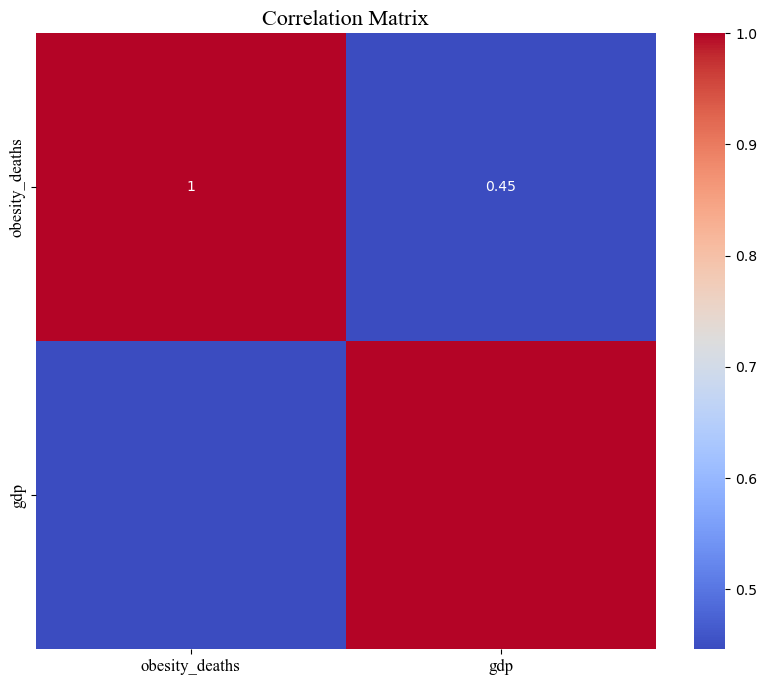

In [271]:
#use a heatmap to display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontname='Times New Roman', fontsize=16)
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)
plt.show()

In [260]:
#Extract the correlation coefficient of two specific columns
correlation_coefficient = correlation_matrix.loc[column1, column2]
print(f"The correlation coefficient between {column1} and {column2} is: {correlation_coefficient}")

The correlation coefficient between obesity_deaths and gdp is: 0.4460823511829229


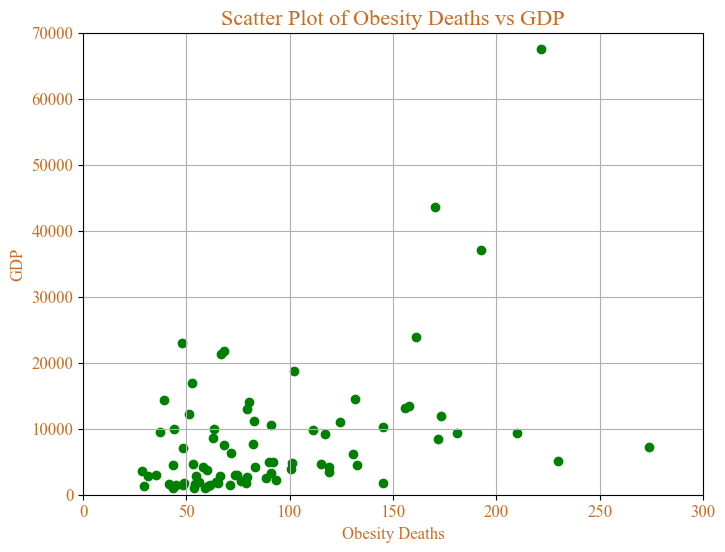

In [261]:
#Scatterplot to further examine correlation
plt.figure(figsize=(8, 6))
plt.scatter(df1['obesity_deaths'], df1['gdp'], color = 'green')
plt.title('Scatter Plot of Obesity Deaths vs GDP',fontname='Times New Roman', fontsize=16, color = 'chocolate')
plt.xlabel('Obesity Deaths',fontname='Times New Roman', fontsize=12, color = 'chocolate')
plt.ylabel('GDP',fontname='Times New Roman', fontsize=12, color = 'chocolate')
plt.xticks(fontname='Times New Roman', fontsize=12, color = 'chocolate')
plt.yticks(fontname='Times New Roman', fontsize=12, color = 'chocolate')
plt.ylim(0,70000)
plt.xlim(0,300)
plt.grid(True)
plt.show()

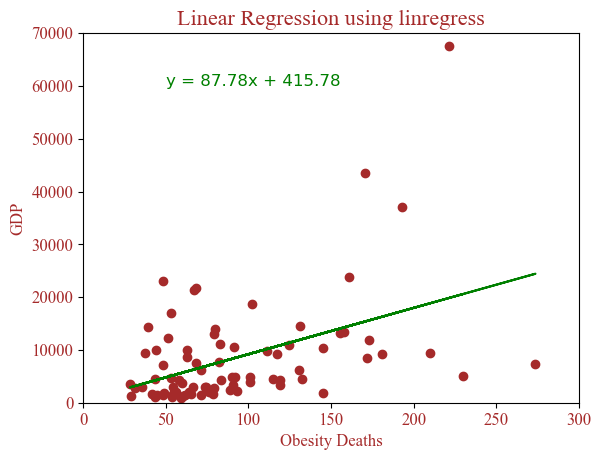

Slope: 87.77929964287213
Intercept: 415.7755527167001
R-squared: 0.1989894640368845
P-value: 3.784889178986232e-05
Standard Error: 20.070159412582765


In [262]:
x_values = df1.obesity_deaths
y_values = df1.gdp

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(df1.obesity_deaths, df1.gdp)

# Calculate the regression line
regress_values = [slope * x + intercept for x in df1.obesity_deaths]

# Plot the data and the regression line
plt.scatter(df1.obesity_deaths, df1.gdp, color = 'brown')
plt.plot(df1.obesity_deaths, regress_values, color = "green")
plt.xlabel('Obesity Deaths', fontname='Times New Roman', fontsize=12, color = 'brown')
plt.ylabel('GDP',fontname='Times New Roman', fontsize=12, color = 'brown')
plt.title('Linear Regression using linregress',fontname='Times New Roman', fontsize=16, color = 'brown')
plt.ylim(0,70000)
plt.xlim(0,300)
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(50, 60000, equation, color='green', fontsize=12)
plt.xticks(fontname='Times New Roman', fontsize=12, color = 'brown')
plt.yticks(fontname='Times New Roman', fontsize=12, color = 'brown')
plt.show()

# Print relevant metrics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {rvalue**2}")
print(f"P-value: {pvalue}")
print(f"Standard Error: {stderr}")

In [263]:
# the correlation coeffiecient and scatterplot both show a moderate, 
#positive relationship between the two variables

In [266]:
#confirm the coefficient, just to be safe
x = df1.obesity_deaths
y = df1.gdp
correlation_coefficient, p_value = stats.pearsonr(x, y)

print(f"The Pearson correlation coefficient between X and Y is: {correlation_coefficient}")

The Pearson correlation coefficient between X and Y is: 0.44608235118292283


In [142]:
#conduct a t test, then realize a t test is not needed for any aspect of what youre doing.
#continue conducting t test.
column1 = df1['obesity_deaths']
column2 = df1['gdp']

t_stat, p_val = ttest_ind(column1, column2, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

alpha = 0.05
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

T-statistic: -7.29894152631002
P-value: 2.1147205059744792e-10
Reject the null hypothesis: There is a significant difference between the two groups.


In [269]:
#notes:
#correlation coefficient is 0.44608235118292283. a weak to moderate correlation.
#both the scatterplot and the linear regression show a moderate correlation.
#the low r^2 score (0.1989894640368845) shows a weak correlation correlation between variables.
#the low p-value score (3.784889178986232e-05) shows statistically significant relationship
#between the variables.
#the heatmap shows a weak correlation between variables.
#overall, i would say there is a weak correlation between variables.


#further reading: Relationship Between National Economic Development and Body Mass Index in Chinese Children and Adolescents Aged 5–19 
#From 1986 to 2019 
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8110708/#:~:text=In%20general%2C%20Seydel%20et%20al,prevalence%2C%20respectively%20(14).